# library

In [8]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm
from tensorflow.keras import callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator




In [9]:
# PIL import
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# upload dataset

In [10]:
class_names = ['Heart', 'Oblong', 'Oval', 'Round', 'Square']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [11]:
def load_data():
    
    datasets = ['../input/face-shape-dataset/FaceShape Dataset/training_set', '../input/face-shape-dataset/FaceShape Dataset/testing_set']
    output = []
    
    # training-test
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # ex) heart~
        for folder in os.listdir(dataset):
            if folder != "desktop.ini":

                label = class_names_label[folder]


                # file 별
                for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                    if file != "desktop.ini":


                        # Get the path name of the image
                        img_path = os.path.join(os.path.join(dataset, folder), file)
                        
                        try:
                            # Leitura e redirecionamento da imagem
                            image = cv2.imread(img_path)
                           
                            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                            image = cv2.resize(image, IMAGE_SIZE) 

                            # Append da image e do seu label correspondente
                            images.append(image)
                            labels.append(label)
                        except Exception as e:
                            print(f"Broken: {img_path}")
                        
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [12]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading ../input/face-shape-dataset/FaceShape Dataset/training_set


 70%|██████▉   | 557/800 [00:10<00:04, 54.27it/s]

Broken: ../input/face-shape-dataset/FaceShape Dataset/training_set/Oblong/oblong (724).jpg


100%|██████████| 800/800 [00:16<00:00, 48.84it/s]


Loading ../input/face-shape-dataset/FaceShape Dataset/testing_set


100%|██████████| 200/200 [00:04<00:00, 46.93it/s]


In [13]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

# CNN modeling

In [14]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

train_images = train_images / 255.0
test_images = test_images / 255.0

Number of training examples: 3999
Number of testing examples: 1000
Each image is of size: (150, 150)


In [15]:
model = tf.keras.Sequential([

    tf.keras.layers.Conv2D(60, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(80, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(100, (3, 3), activation = 'relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(120, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(140, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')

])

tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')

In [16]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)

In [17]:
model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [18]:
# 조기 종료 콜백 설정
early_stopping_cb = callbacks.EarlyStopping(monitor='val_loss', 
                                            patience=5, 
                                            restore_best_weights=True)

In [19]:
# 모델 훈련
history = model.fit(train_images, train_labels, 
                    epochs=50, 
                    validation_data=(test_images, test_labels), 
                    callbacks=[early_stopping_cb])
model.save("face.h5")

Epoch 1/50
125/125 [==============================] - 186s 1s/step - loss: 1.6111 - accuracy: 0.2078 - val_loss: 1.6089 - val_accuracy: 0.2000
Epoch 2/50
125/125 [==============================] - 184s 1s/step - loss: 1.6083 - accuracy: 0.2206 - val_loss: 1.6022 - val_accuracy: 0.2860
Epoch 3/50
125/125 [==============================] - 185s 1s/step - loss: 1.5784 - accuracy: 0.2728 - val_loss: 1.5539 - val_accuracy: 0.2970
Epoch 4/50
125/125 [==============================] - 185s 1s/step - loss: 1.5373 - accuracy: 0.3188 - val_loss: 1.5197 - val_accuracy: 0.3280
Epoch 5/50
125/125 [==============================] - 185s 1s/step - loss: 1.5008 - accuracy: 0.3451 - val_loss: 1.4944 - val_accuracy: 0.3860
Epoch 6/50
125/125 [==============================] - 186s 1s/step - loss: 1.4688 - accuracy: 0.3686 - val_loss: 1.4986 - val_accuracy: 0.3300
Epoch 7/50
125/125 [==============================] - 186s 1s/step - loss: 1.4430 - accuracy: 0.3903 - val_loss: 1.4872 - val_accuracy: 0.3680

In [20]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

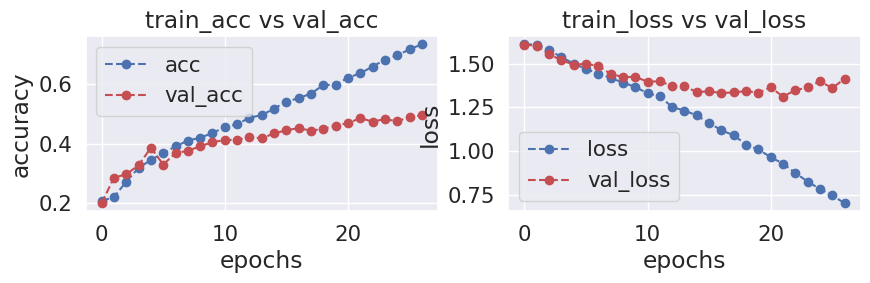

In [21]:
plot_accuracy_loss(history)